In [1]:
import scipy.io
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
data = scipy.io.loadmat('mnist_10digits.mat')

#standardize data to [0,1]
xtrain = data['xtrain']/255
ytrain = data['ytrain'].ravel()
xtest = data['xtest']/255
ytest = data['ytest'].ravel()

In [3]:
#set seed for downsampling
seed = 55
np.random.seed(seed)

In [4]:
#downsample for knn and svm
m = 5000
ind = np.random.choice(xtrain.shape[0], m, replace=False)
print(ind)
xtrain_2 = xtrain[ind]
ytrain_2 = ytrain[ind]

[32593 59700  4764 ... 29518 39147 50296]


### KNN

In [5]:
#find best k using accuracy as metric
start = time.time()

k_accs = {}

for i in range(1,6):
    knn_clf = KNeighborsClassifier(n_neighbors=i).fit(xtrain_2, ytrain_2)
    knn_pred = knn_clf.predict(xtest)
  
    # Find acc at each k
    knn_acc = accuracy_score(ytest, knn_pred)
    print("KNN Classifier Accuracy:", knn_acc, 'at k =', i)
    k_accs[i] = knn_acc
    
    
end = time.time()  
print('Run time:', end-start)

KNN Classifier Accuracy: 0.9386 at k = 1
KNN Classifier Accuracy: 0.9246 at k = 2
KNN Classifier Accuracy: 0.9371 at k = 3
KNN Classifier Accuracy: 0.9345 at k = 4
KNN Classifier Accuracy: 0.9377 at k = 5
Run time: 7.14811110496521


In [6]:
max_k = max(k_accs, key=k_accs.get)
print(max_k)

1


In [7]:
# Rerun knn using best k value
knn_clf = KNeighborsClassifier(n_neighbors=max_k).fit(xtrain_2, ytrain_2)
knn_pred = knn_clf.predict(xtest)

#find metrics
knn_acc = accuracy_score(ytest, knn_pred)
knn_cm = confusion_matrix(ytest, knn_pred)
knn_precision = precision_score(ytest, knn_pred, average=None)
knn_recall = recall_score(ytest, knn_pred, average=None)
knn_f1 = f1_score(ytest, knn_pred, average=None)

### Logistic Regression

In [8]:
#log reg model
start = time.time()

lr_clf = LogisticRegression(max_iter=10000).fit(xtrain, ytrain)

lr_pred = lr_clf.predict(xtest)

end = time.time()
print('Run time:', end-start)

Run time: 149.2913339138031


In [9]:
#find metrics
lr_acc = accuracy_score(ytest, lr_pred)
lr_cm = confusion_matrix(ytest, lr_pred)
lr_precision = precision_score(ytest, lr_pred, average=None)
lr_recall = recall_score(ytest, lr_pred, average=None)
lr_f1 = f1_score(ytest, lr_pred, average=None)

### SVM

In [10]:
#svm model
start = time.time()

svm_clf = SVC(kernel='linear').fit(xtrain_2, ytrain_2)
svm_pred = svm_clf.predict(xtest)

end = time.time()


print('Run time:', end-start)

Run time: 7.694239854812622


In [11]:
#find metrics
svm_acc = accuracy_score(ytest, svm_pred)
svm_cm = confusion_matrix(ytest, svm_pred)
svm_precision = precision_score(ytest, svm_pred, average=None)
svm_recall = recall_score(ytest, svm_pred, average=None)
svm_f1 = f1_score(ytest, svm_pred, average=None)

### Kernal SVM

In [12]:
#kernal svm model
start = time.time()

k_svm_clf = SVC(kernel='rbf').fit(xtrain_2, ytrain_2)
k_svm_pred = k_svm_clf.predict(xtest)

end = time.time()

print('Run time:', end-start)

Run time: 15.709005117416382


In [13]:
#find metrics
k_svm_acc = accuracy_score(ytest, k_svm_pred)
k_svm_cm = confusion_matrix(ytest, k_svm_pred)
k_svm_precision = precision_score(ytest, k_svm_pred, average=None)
k_svm_recall = recall_score(ytest, k_svm_pred, average=None)
k_svm_f1 = f1_score(ytest, k_svm_pred, average=None)

### Neural Network

In [14]:
#Neural network model
start = time.time()

nn_clf = MLPClassifier(hidden_layer_sizes=(20, 10)).fit(xtrain, ytrain)
nn_pred = nn_clf.predict(xtest)

end = time.time()

print('Run time:', end-start)

Run time: 294.62807035446167


/Users/yuxi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
#find metrics
nn_acc = accuracy_score(ytest, nn_pred)
nn_cm = confusion_matrix(ytest, nn_pred)
nn_precision = precision_score(ytest, nn_pred, average=None)
nn_recall = recall_score(ytest, nn_pred, average=None)
nn_f1 = f1_score(ytest, nn_pred, average=None)

### Visualize Results

In [22]:
def results(clf, cm, precision, recall, f1, accuracy):
    
    # show confusion matrix
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{clf} Confusion Matrix')
    plt.savefig(f'{clf} Confusion Matrix')
    plt.show()
    
    #show metrics
    df = pd.DataFrame({"Precision": precision,"Recall": recall,"F1-Score": f1, "Accuracy": accuracy, })
    display(df)  

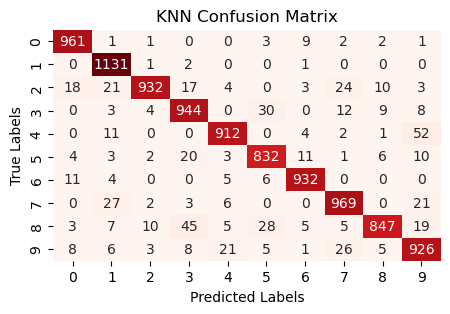

,Precision,Recall,F1-Score,Accuracy
0,0.956219,0.980612,0.968262,0.9386
1,0.931631,0.996476,0.962963,0.9386
2,0.975916,0.903101,0.938098,0.9386
3,0.908566,0.934653,0.921425,0.9386
4,0.953975,0.928717,0.941176,0.9386
5,0.920354,0.932735,0.926503,0.9386
6,0.964803,0.972860,0.968815,0.9386
7,0.930836,0.942607,0.936684,0.9386
8,0.962500,0.869610,0.913700,0.9386
9,0.890385,0.917740,0.903856,0.9386


In [23]:
results("KNN", knn_cm, knn_precision, knn_recall, knn_f1, knn_acc)

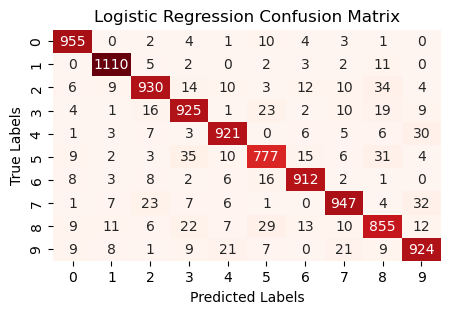

,Precision,Recall,F1-Score,Accuracy
0,0.953094,0.974490,0.963673,0.9256
1,0.961872,0.977974,0.969856,0.9256
2,0.929071,0.901163,0.914904,0.9256
3,0.904203,0.915842,0.909985,0.9256
4,0.936928,0.937882,0.937405,0.9256
5,0.895161,0.871076,0.882955,0.9256
6,0.943123,0.951983,0.947532,0.9256
7,0.932087,0.921206,0.926614,0.9256
8,0.880536,0.877823,0.879177,0.9256
9,0.910345,0.915758,0.913043,0.9256


In [24]:
results("Logistic Regression", lr_cm, lr_precision, lr_recall, lr_f1, lr_acc)

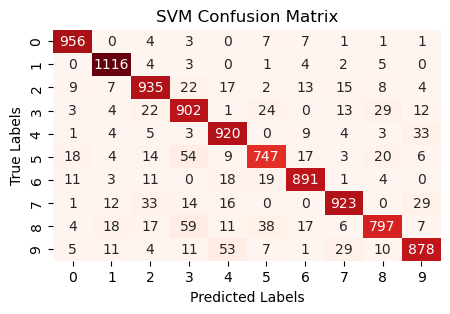

,Precision,Recall,F1-Score,Accuracy
0,0.948413,0.975510,0.961771,0.9065
1,0.946565,0.983260,0.964564,0.9065
2,0.891325,0.906008,0.898606,0.9065
3,0.842204,0.893069,0.866891,0.9065
4,0.880383,0.936864,0.907745,0.9065
5,0.884024,0.837444,0.860104,0.9065
6,0.929093,0.930063,0.929577,0.9065
7,0.925777,0.897860,0.911605,0.9065
8,0.908780,0.818275,0.861156,0.9065
9,0.905155,0.870168,0.887317,0.9065


In [25]:
results("SVM", svm_cm, svm_precision, svm_recall, svm_f1, svm_acc)

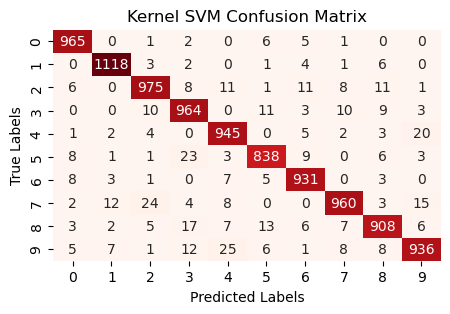

,Precision,Recall,F1-Score,Accuracy
0,0.966934,0.984694,0.975733,0.954
1,0.976419,0.985022,0.980702,0.954
2,0.951220,0.944767,0.947982,0.954
3,0.934109,0.954455,0.944172,0.954
4,0.939364,0.962322,0.950704,0.954
5,0.951192,0.939462,0.945290,0.954
6,0.954872,0.971816,0.963270,0.954
7,0.962889,0.933852,0.948148,0.954
8,0.948798,0.932238,0.940445,0.954
9,0.951220,0.927651,0.939288,0.954


In [26]:
results("Kernel SVM", k_svm_cm, k_svm_precision, k_svm_recall, k_svm_f1, k_svm_acc)

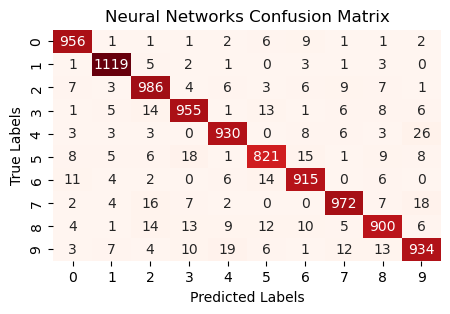

,Precision,Recall,F1-Score,Accuracy
0,0.959839,0.975510,0.967611,0.9488
1,0.971354,0.985903,0.978575,0.9488
2,0.938154,0.955426,0.946711,0.9488
3,0.945545,0.945545,0.945545,0.9488
4,0.951894,0.947047,0.949464,0.9488
5,0.938286,0.920404,0.929259,0.9488
6,0.945248,0.955115,0.950156,0.9488
7,0.959526,0.945525,0.952474,0.9488
8,0.940439,0.924025,0.932160,0.9488
9,0.933067,0.925669,0.929353,0.9488


In [27]:
results("Neural Networks", nn_cm, nn_precision, nn_recall, nn_f1, nn_acc)